# Simple models
This example demonstrates how giotto-time can be used for simple prediction pipelines

## Initializing the time series

In [1]:
import sys
sys.path.append('../')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from gtime.preprocessing import TimeSeriesPreparation
from gtime.model_selection.cv_pipeline import CVPipeline
from gtime.metrics import rmse, mape
from gtime.time_series_models import Naive, AR
from sklearn.model_selection import ParameterGrid


In [9]:
df_sp = pd.read_csv('https://storage.googleapis.com/l2f-open-models/giotto-time/examples/data/^GSPC.csv')
df_sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-18,2072.840088,2106.850098,2061.229980,2099.500000,2099.500000,4128210000
1,2015-03-19,2098.689941,2098.689941,2085.560059,2089.270020,2089.270020,3305220000
2,2015-03-20,2090.320068,2113.919922,2090.320068,2108.100098,2108.100098,5554120000
3,2015-03-23,2107.989990,2114.860107,2104.419922,2104.419922,2104.419922,3267960000
4,2015-03-24,2103.939941,2107.629883,2091.500000,2091.500000,2091.500000,3189820000


In [10]:
df_close = df_sp.set_index('Date')['Close']

In [11]:
df_close.index = pd.to_datetime(df_close.index)

## Time Series Preparation
The input time series has to be a `DataFrame` with a `PeriodIndex`. Use the provided class `TimeSeriesPreparation` to convert the time series into this format.

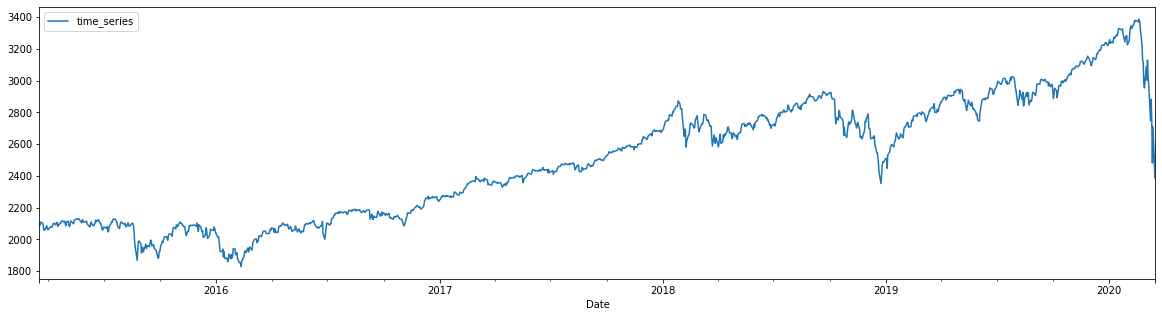

In [12]:
time_series_preparation = TimeSeriesPreparation()
period_index_time_series = time_series_preparation.transform(df_close)
period_index_time_series.plot(figsize=(20, 5))
plt.show()

## Compare models

In [13]:
scoring = {'RMSE': rmse,
           'MAPE': mape}
models = {
    Naive: {'horizon': [3, 5, 9]},
    AR: {'horizon': [3, 5, 7],
         'p': [2, 3, 4]}
}

In [14]:
c = CVPipeline(models_sets=models, metrics=scoring)
c.fit(period_index_time_series)


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


In [15]:
c.best_model_

AR(explainer_type=None, horizon=3, p=4)

In [16]:
c.cv_results_

Fit time  Train score  \
Naive(horizon=3)                        RMSE  0.025407    31.826482   
                                        MAPE  0.025407     0.858143   
Naive(horizon=5)                        RMSE  0.013003    38.014856   
                                        MAPE  0.013003     1.032839   
Naive(horizon=9)                        RMSE  0.018542    46.145903   
                                        MAPE  0.018542     1.292373   
AR(explainer_type=None, horizon=3, p=2) RMSE  0.017989    31.265429   
                                        MAPE  0.017989     0.851645   
AR(explainer_type=None, horizon=3, p=3) RMSE  0.020750    31.065796   
                                        MAPE  0.020750     0.850036   
AR(explainer_type=None, horizon=3, p=4) RMSE  0.023066    30.876091   
                                        MAPE  0.023066     0.850636   
AR(explainer_type=None, horizon=5, p=2) RMSE  0.022001    37.035211   
                                        MAPE  0.022001     1.014190   
AR(explainer_type=None, horizon=5, p=3) RMSE  0.024006    36.680571   
                                        MAPE  0.024006     1.013210   
AR(explainer_type=None, horizon=5, p=4) RMSE  0.031039    36.537369   
                                        MAPE  0.031039     1.011640   
AR(explainer_type=None, horizon=7, p=2) RMSE  0.026441    41.033469   
                                        MAPE  0.026441     1.135228   
AR(explainer_type=None, horizon=7, p=3) RMSE  0.026773    40.752860   
                                        MAPE  0.026773     1.130845   
AR(explainer_type=None, horizon=7, p=4) RMSE  0.031136    40.542622   
                                        MAPE  0.031136     1.127370   

                                              Test score  
Naive(horizon=3)                        RMSE   65.972851  
                                        MAPE    2.584778  
Naive(horizon=5)                        RMSE   78.886857  
                                        MAPE    2.929509  
Naive(horizon=9)                        RMSE  121.773307  
                                        MAPE    4.507226  
AR(explainer_type=None, horizon=3, p=2) RMSE   61.439819  
                                        MAPE    2.341968  
AR(explainer_type=None, horizon=3, p=3) RMSE   52.004225  
                                        MAPE    1.969670  
AR(explainer_type=None, horizon=3, p=4) RMSE   46.751402  
                                        MAPE    1.849394  
AR(explainer_type=None, horizon=5, p=2) RMSE   77.501442  
                                        MAPE    2.880187  
AR(explainer_type=None, horizon=5, p=3) RMSE   80.473266  
                                        MAPE    3.028828  
AR(explainer_type=None, horizon=5, p=4) RMSE   81.303609  
                                        MAPE    3.049829  
AR(explainer_type=None, horizon=7, p=2) RMSE  100.241796  
                                        MAPE    3.593013  
AR(explainer_type=None, horizon=7, p=3) RMSE   98.194260  
                                        MAPE    3.525434  
AR(explainer_type=None, horizon=7, p=4) RMSE  100.973499  
                                        MAPE    3.646443

In [17]:
c.predict()

,y_1,y_2,y_3
Date,,,
2020-03-13,2677.060779,2662.034199,2709.380125
2020-03-16,2385.042801,2419.127836,2343.749212
2020-03-17,2549.839017,2487.037182,2551.979429


In [18]:
c.model_list

[Naive(horizon=3),
 Naive(horizon=5),
 Naive(horizon=9),
 AR(explainer_type=None, horizon=3, p=2),
 AR(explainer_type=None, horizon=3, p=3),
 AR(explainer_type=None, horizon=3, p=4),
 AR(explainer_type=None, horizon=5, p=2),
 AR(explainer_type=None, horizon=5, p=3),
 AR(explainer_type=None, horizon=5, p=4),
 AR(explainer_type=None, horizon=7, p=2),
 AR(explainer_type=None, horizon=7, p=3),
 AR(explainer_type=None, horizon=7, p=4)]

In [19]:
c.model_list[2].predict()

,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9
Date,,,,,,,,,
2020-03-05,3023.939941,3023.939941,3023.939941,3023.939941,3023.939941,3023.939941,3023.939941,3023.939941,3023.939941
2020-03-06,2972.370117,2972.370117,2972.370117,2972.370117,2972.370117,2972.370117,2972.370117,2972.370117,2972.370117
2020-03-09,2746.560059,2746.560059,2746.560059,2746.560059,2746.560059,2746.560059,2746.560059,2746.560059,2746.560059
2020-03-10,2882.229980,2882.229980,2882.229980,2882.229980,2882.229980,2882.229980,2882.229980,2882.229980,2882.229980
2020-03-11,2741.379883,2741.379883,2741.379883,2741.379883,2741.379883,2741.379883,2741.379883,2741.379883,2741.379883
2020-03-12,2480.639893,2480.639893,2480.639893,2480.639893,2480.639893,2480.639893,2480.639893,2480.639893,2480.639893
2020-03-13,2711.020020,2711.020020,2711.020020,2711.020020,2711.020020,2711.020020,2711.020020,2711.020020,2711.020020
2020-03-16,2386.129883,2386.129883,2386.129883,2386.129883,2386.129883,2386.129883,2386.129883,2386.129883,2386.129883
2020-03-17,2529.189941,2529.189941,2529.189941,2529.189941,2529.189941,2529.189941,2529.189941,2529.189941,2529.189941
